In [115]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [119]:
data = pd.read_csv(r"C:\Users\IP G3\Downloads\Personality Test\personality_dataset.csv")

In [121]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [123]:
data.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [125]:
data.shape

(2900, 8)

In [127]:
data.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [129]:
numerical_columns = (['Time_spent_Alone', 'Social_event_attendance',
       'Going_outside','Friends_circle_size','Post_frequency'])
categorical_columns = (['Stage_fear', 'Drained_after_socializing'])

In [131]:
for column in numerical_columns:
    data[column] = data[column].fillna(data[column].mean())

In [133]:
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

In [135]:
data.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [137]:
data_dummies = pd.get_dummies(data, columns= ['Stage_fear', 'Drained_after_socializing', 'Personality'], drop_first= 'true')

In [139]:
data_dummies = data_dummies.astype(int)

In [141]:
data_dummies.head(10)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes,Personality_Introvert
0,4,4,6,13,5,0,0,0
1,9,0,0,0,3,1,1,1
2,9,1,2,5,2,1,1,1
3,0,6,7,14,8,0,0,0
4,3,9,4,8,5,0,0,0
5,1,7,5,6,6,0,0,0
6,4,9,3,7,7,0,0,0
7,2,8,4,7,8,0,0,0
8,10,1,3,0,3,1,1,1
9,0,8,6,13,8,0,0,0


In [143]:
X = data_dummies.drop('Personality_Introvert', axis = 1)
Y = data_dummies['Personality_Introvert']

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 1)

In [149]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [91]:
y_pred = model.predict(X_test)

In [159]:
y_Proba = model.predict_proba(X_test)[:,1] # [:,1] avoid multilabel format (its also important if we dont use it then again error will come)
y_pred = (y_Proba >= 0.5).astype(int) 

Above step is important because if we dont do this then error will come that classification metrics can't handle a mix of binary and multilabel-indicator targets. Because when we predict(y_pred) then values come in like 0.5. 0.7 like this so that's why

In [161]:
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy_Score', accuracy)

Accuracy_Score 0.9137931034482759


In [171]:
Confusion_Matrix = confusion_matrix(Y_test, y_pred)
print('Confusion_Matrix is:\n', Confusion_Matrix)

Confusion_Matrix is:
 [[285  33]
 [ 17 245]]


In [177]:
Precision = precision_score(Y_test, y_pred) # Out of what the model predicted as positive, how many were actually right
print('Precision is:\n', Precision)

Precision is:
 0.8812949640287769


In [179]:
Recall = recall_score(Y_test, y_pred) # Recall tells us out of all the actual positive cases, how many did the model catch correctly
print('Recall is:\n', Recall)

Recall is:
 0.9351145038167938


In [183]:
F1_Score = f1_score(Y_test, y_pred)
print('F1 Score is:\n', F1_Score)

F1 Score is:
 0.9074074074074074


## Compute ROC Curve

In [186]:
fpr, tpr, thresholds = roc_curve(Y_test, y_Proba)

The ROC curve helps us understand the performance of our model — how many times it is right and how many times it is wrong when making predictions.
How many real 1s we correctly found → TPR
How many real 0s we wrongly marked as 1 → FPR

## Compute AUC Curve

In [193]:
auc_score = roc_auc = auc(fpr, tpr)
print(auc_score)

0.9027197657112678


AUC tells how well your model can separate between two classes (0 and 1, like sick vs healthy, spam vs not spam, etc.)

## Visualization

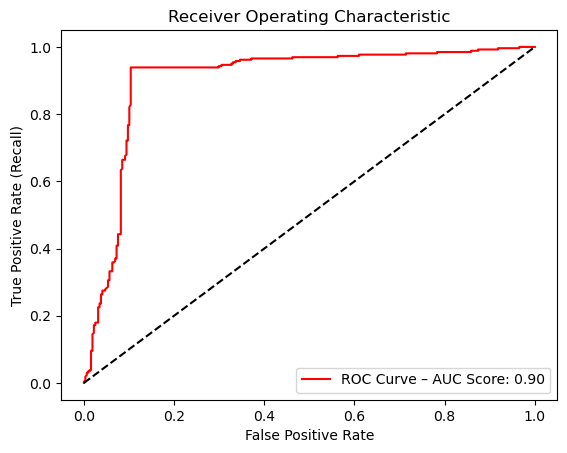

In [197]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC Curve – AUC Score: 0.90', color = 'red')
plt.plot([0,1], [0,1], linestyle = '--', color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()